In [30]:
# importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import plotly.graph_objects as go
!pip install lmfit
import lmfit
import math
from lmfit import Model
from scipy.integrate import solve_ivp # ode solver

import matplotlib.ticker as ticker

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Obtendo os dados de covid - 19 na Alemanha

In [31]:
dadosCOVID = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
dadosge = dadosCOVID.loc[dadosCOVID.location == 'Germany']
dadosge.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
20035,DEU,Europe,Germany,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
20036,DEU,Europe,Germany,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
20037,DEU,Europe,Germany,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
20038,DEU,Europe,Germany,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
20039,DEU,Europe,Germany,2020-01-27,1.0,1.0,NaN,NaN,0.0,NaN,0.012,0.012,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936


Definindo um dataset  com os dados que serão fitados

In [32]:

dadosCOVID = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
dadosge = dadosCOVID.loc[dadosCOVID.location == 'Germany']


dadosge.index = np.arange(len(dadosge.date))

dadosged1 = dadosge.loc[dadosge.date == '2020-01-27']

data1 = dadosged1.index[0]

dadosged2 = dadosge.loc[dadosge.date == '2020-11-26']

data2 = dadosged2.index[0]


dadosged3 = dadosge.loc[dadosge.date == '2020-06-15']

data3 = dadosged3.index[0]

dados = dadosge.iloc[data1:data2+1]


dados = dados[['location', 'date', 'total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed']]
dados.head()

,location,date,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed
4,Germany,2020-01-27,1.0,NaN,NaN,NaN
5,Germany,2020-01-28,4.0,0.571,NaN,0.0
6,Germany,2020-01-29,4.0,0.571,NaN,0.0
7,Germany,2020-01-30,4.0,0.571,NaN,0.0
8,Germany,2020-01-31,5.0,0.714,NaN,0.0


Separando o dataset da primeira onda: 


In [33]:


dados1onda = dadosge.iloc[data1:data3+1]

dados1onda = dados1onda[['location', 'date', 'total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed']]

dados1onda.tail()

,location,date,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed
140,Germany,2020-06-11,186691.0,317.000,8772.0,19.571
141,Germany,2020-06-12,187226.0,328.857,8783.0,17.857
142,Germany,2020-06-13,187267.0,259.571,8793.0,17.143
143,Germany,2020-06-14,187518.0,252.571,8801.0,16.571
144,Germany,2020-06-15,187682.0,224.714,8807.0,16.000


Separando o dataset da segunda onda

In [34]:
dados2onda = dadosge.iloc[data3:data2+1]

dados2onda = dados2onda[['location', 'date', 'total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed']]

dados2onda.head()

,location,date,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed
144,Germany,2020-06-15,187682.0,224.714,8807.0,16.000
145,Germany,2020-06-16,188252.0,249.429,8820.0,12.000
146,Germany,2020-06-17,188604.0,297.429,8851.0,14.143
147,Germany,2020-06-18,189817.0,446.571,8875.0,14.714
148,Germany,2020-06-19,190299.0,439.000,8887.0,14.857


## Analisando a curva de casos acumulados

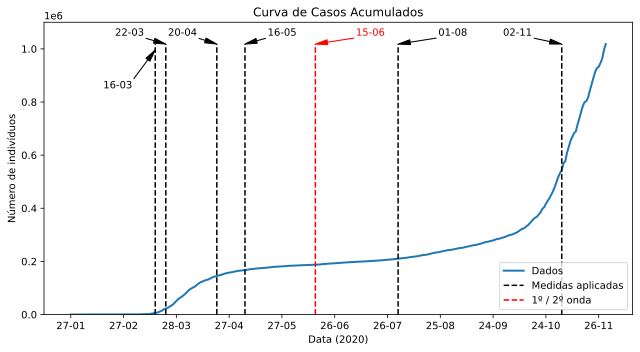

In [35]:
import matplotlib.dates as mdates
import datetime as dt 




y = np.array(dados.total_cases)
t = np.array(dados.date)



fig, ax = plt.subplots(figsize=(9, 5), tight_layout=True)

plt.title("Curva de Casos Acumulados")

ax.plot(t,y, label = "Dados", linewidth=2.0)

#1º Interferência:
ax.plot(len(y)*[48], y, 'r--', color = 'black', label = 'Medidas aplicadas')

ax.annotate('16-03', xy=(48, y[-2]),  xycoords='data',
            xytext=(0.15, 0.8), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.005,  width = 0.05, headwidth = 5),
            horizontalalignment='right', verticalalignment='top',
            )


# 2º interferência
ax.plot(len(y)*[54], y, 'r--', color = 'black')

ax.annotate('22-03', xy=(54, y[-1]),  xycoords='data',
            xytext=(0.17, 0.98), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.005,  width = 0.05, headwidth = 5),
            horizontalalignment='right', verticalalignment='top',
            )


# 3º interferência 
ax.plot(len(y)*[83], y, 'r--', color = 'black')

ax.annotate('20-04', xy=(83, y[-1]),  xycoords='data',
            xytext=(0.26, 0.98), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.005,  width = 0.05, headwidth = 5),
            horizontalalignment='right', verticalalignment='top',
            )


# 4º interferência
ax.plot(len(y)*[99], y, 'r--', color = 'black')

ax.annotate('16-05', xy=(99, y[-1]),  xycoords='data',
            xytext=(0.38, 0.98), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.005,  width = 0.05, headwidth = 5),
            horizontalalignment='left', verticalalignment='top',
            )

# 5º interferência 
ax.plot(len(y)*[139], y, 'r--', color = 'red' ,label = "1º / 2º onda")

ax.annotate('15-06', color = 'red', xy=(139, y[-1]),  xycoords='data',
            xytext=(0.53, 0.98), textcoords='axes fraction',
            arrowprops=dict( color = 'red', shrink=0.005,  width = 0.05, headwidth = 5),
            horizontalalignment='left', verticalalignment='top',
            )

# 6º interferência 
ax.plot(len(y)*[186], y, 'r--', color = 'black')

ax.annotate('01-08', xy=(186, y[-1]),  xycoords='data',
            xytext=(0.67, 0.98), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.005,  width = 0.05, headwidth = 5),
            horizontalalignment='left', verticalalignment='top',
            )

# 7ª interferência

ax.plot(len(y)*[279], y, 'r--', color = 'black')

ax.annotate('02-11', xy=(279, y[-1]),  xycoords='data',
            xytext=(0.78, 0.98), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.005,  width = 0.05, headwidth = 5),
            horizontalalignment='left', verticalalignment='top',
            )


plt.xlabel('Data (2020)')

plt.ylabel('Número de indivíduos')

plt.legend(loc='lower right')

plt.xticks(t, ('','27-01','27-02','28-03','27-04','27-05','26-06','26-07','25-08','24-09', '24-10', '26-11'))

ax.xaxis.set_major_locator(ticker.MaxNLocator(13))

ax.yaxis.set_ticks(np.arange(0, 1200000, 200000))

plt.ylim([0,1100000])

ax.tick_params(axis='x', rotation=0)


plt.savefig('Medidas_adotadas.svg')


plt.show()


## Fitando a 1º onda de casos acumulados

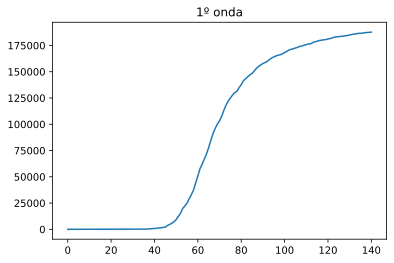

In [36]:
# intervalo fitado:

y1onda = np.array(dados1onda.total_cases)
t1onda = np.arange(0, len(y1onda))

plt.figure()
plt.title("1º onda")
plt.plot(t1onda, y1onda)
plt.show()
#print(t[-1])

Definindo a função $\beta_1(t):$


$$\beta_1(t) = \cfrac{ \beta_0 - \beta_1 }{1 + e^{-k(x_0 - t)}} + \beta_1 $$

In [37]:
def betad1(t, b0, b1, x0):
        k = 0.25
        return (b0 - b1) /(1 + np.exp(-k * (-t + x0))) + b1

Definindo a função para ajustar os dados ao modelo

In [38]:
def SolverSEIR(days, t, yR, Npop):

    def dotSEIR(y,t,Npop,beta,gama, gamad, sigma, p , q, delta):
        S,E,I, Id, R, Rd, D= y 
        dydt = [-beta(t)*S*(I + q*Id)/Npop , 
                beta(t)*S*(I + q*Id)/Npop - sigma*E, 
        (1-p)*sigma*E - gama*I, 
        p*sigma*E -gamad*Id- delta*gamad*Id/(1-delta),
         gama*I,
         gamad*Id,
         delta*gamad*Id/(1-delta) ]
        return dydt
    
    def betad1(t, b0, b1, x0):
        k = 0.25
        return (b0 - b1) /(1 + np.exp(-k * (-t + x0))) + b1
    
    #### Valores inicias arbitrados dos parâmetros para o processo de otimização dados como tuplas (esperado, mínimo, máximo)
    
    params_init_min_max = { "p": (0.5, 0.01, 0.8),
                           "q": (0.3, 0.01, .5),
                          "b0": (0.5, 0.01, 1.0),
                           "b1": (0.5, 0.01, 1.0),
                           "x0": (50, 45, 65),
                           "gamad": (1/14, 0.07, 1/7),
                           "delta": (0.049, 0.048, 0.052),}
   
    
    ### Def. da função solver do sistema de EDOs do modelo SIR que é recursivamente chamada pelo algoritmo de otimização (fitting aos dados)  
    def SolverEDOs(days, Npop, p, q,b0, b1, x0,gamad, delta):
        
        # definição da função beta(t) = R_0(t)*gama
        def beta(t):
            return betad1(t,b0, b1, x0)

        
        # Valores iniciais
        s0 = Npop - e0 - i0 -id0 - r0 - rd0 -d0
        y0 = [s0,e0, i0, id0, r0, rd0, d0]
        
       
        t = np.arange(days)
       
        # Integração do sistema de EDOs -
        ret = odeint(dotSEIR, y0, t, args=(Npop, beta,gama,  gamad, sigma, p , q, delta))
        

        # Salvando os resultados nas variáveis do sistema
        S,E,I,Id, R,Rd, D = ret.T

        C = Id + Rd + D 

        return t, S, E, I, Id,  R, Rd,D, C
    
    ### Definição da função de fitting que chama o solver das EDOs
    def fitter(x,p, q, b0, b1, x0,gamad, delta):
        ret = SolverEDOs(days, Npop, p, q,b0, b1, x0, gamad,  delta) # <-- chama a função solver das EDOs (que chama odeint para integrar)
        casos_acumulados = ret[8]                               
        return casos_acumulados[x]                              
    
    # Cria o modelo de fitting passando a função fitter como parâmetro para lmfit 
    
    mod = lmfit.Model(fitter)
    #
    # Criação do vetor de parâmetros para o fitting, incluindo 3 estimativas (inicial, min, max) p/cada parâmetro
    for kwarg, (init, mini, maxi) in params_init_min_max.items(): # <-- usa as estimativas fornecidas acima
        mod.set_param_hint(str(kwarg), value=init, min=mini, max=maxi, vary=True)
    #
    # Criação do vetor de parâmetros para o otimizador
    params = mod.make_params()
    
    # E fazemos o fitting dos dados
    result_roll = mod.fit(yR, params, method="least_squares", x=t)
    
    ### Parâmetros otimizados 
    paramsfit = result_roll.best_values
    
    parametros = []
    parametros.append(paramsfit['p'])
    parametros.append(paramsfit['q'])
    parametros.append(paramsfit['b0'])
    parametros.append(paramsfit['b1'])
    parametros.append(paramsfit['x0'])
    parametros.append(paramsfit['gamad'])
    parametros.append(paramsfit['delta'])


    ### Chamada do SOLVER com os parâmetros otimizados da curva logística para R_0(t) para obter as var SEIRD

    res_SEIRD_roll = SolverEDOs(days, Npop,*parametros)
    #
    return res_SEIRD_roll, parametros

Definindo o modelo separadamente:

In [39]:
def SEIR(t,y,Npop,p,q,b0,b1,x0,gamad,  delta,sigma, gama):
  S,E,I,Id,R,Rd, D = y
  dydt = [-betad1(t, b0, b1, x0)*S*(I + q*Id)/Npop,betad1(t, b0, b1, x0)*S*(I + q*Id)/Npop - sigma*E, 
          (1-p)*sigma*E - gama*I, 
        p*sigma*E -gamad*Id- delta*gamad*Id/(1-delta),
         gama*I,
         gamad*Id,
         delta*gamad*Id/(1-delta) ]
  return dydt

Ajustando o modelo aos dados de casos acumulados

In [40]:
Npop = 83020000
gama= 1/6
e0 = 0
i0 = 0
id0 =1
r0 = 0
delta = 0.045
rd0 = 0
d0 = 0
s0 = Npop - e0 - i0 - id0 - r0 - rd0 - d0

sigma = 1/5

X0_SEIR = [s0,e0,i0,id0,r0,rd0,d0]

param = SolverSEIR(len(t), t1onda, y1onda, Npop)[1]
#print(param)


X_SEIR = solve_ivp(SEIR, t_span=[t1onda[0], t1onda[-1]], y0 = X0_SEIR, t_eval = t1onda, args=(Npop,*param, sigma, gama))

S_SEIR = X_SEIR.y[0]
E_SEIR = X_SEIR.y[1]
I_SEIR = X_SEIR.y[2]
Id_SEIR = X_SEIR.y[3]
R_SEIR = X_SEIR.y[4]
Rd_SEIR = X_SEIR.y[5]
D_SEIR = X_SEIR.y[6]


C = Id_SEIR +Rd_SEIR + D_SEIR 






Plotando o resultado do ajuste

Valores estimados 
 p= 0.3989603308590172
 q= 0.4217443101054502
 b0= 0.9549257205484459
 b1= 0.08314722769635137
 x0= 56.65257075770372
 gamad= 0.07000000000005846
 delta= 0.04800000896369292
 


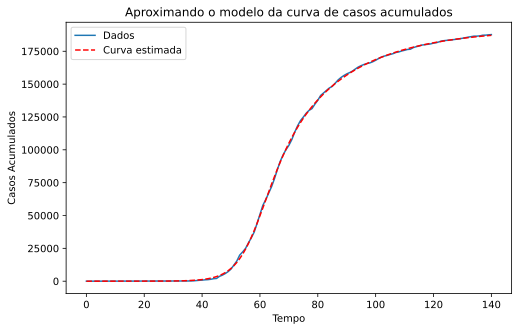

In [41]:
plt.figure(figsize= (8,5))
plt.title('Aproximando o modelo da curva de casos acumulados')
plt.plot(t1onda, y1onda, label = 'Dados')
plt.plot(t1onda,C, 'r--', label ='Curva estimada')
plt.ylabel('Casos Acumulados')
plt.xlabel('Tempo')
plt.legend()
plt.savefig('fitting.svg')



print(f'Valores estimados \n p= {param[0]}\n q= {param[1]}\n b0= {param[2]}\n b1= {param[3]}\n x0= {param[4]}\n gamad= {param[5]}\n delta= {param[6]}\n ')

### Definindo o estimador de erro

In [42]:
def erro(fitting, dados):
  n = len(dados)

  errof =[]

  i = 0

  while i < n:

    if dados[i] ==0:
      errof.append(0)

    
    else:

      erro = np.abs((fitting[i] - dados[i]))/dados[i]

      errof.append(erro)

    i = i+1
  
  erro = np.median(errof)

  return erro

print(erro(C, y1onda))


0.0073111678416803464


### Plotando o Resultado

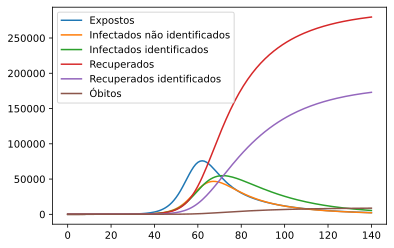

In [43]:
plt.figure()
t = t1onda
#plt.plot(t, S_SEIR, label = 'Suscetíveis')
plt.plot(t, E_SEIR, label = 'Expostos')
plt.plot(t, I_SEIR, label = 'Infectados não identificados')
plt.plot(t, Id_SEIR, label = 'Infectados identificados')
plt.plot(t, R_SEIR, label = 'Recuperados')
plt.plot(t, Rd_SEIR, label = 'Recuperados identificados')
plt.plot(t, D_SEIR, label = 'Óbitos')

plt.legend()
plt.savefig('fitandoasoutrascurvas.svg')
plt.show()

 Comparando a curva de óbitos

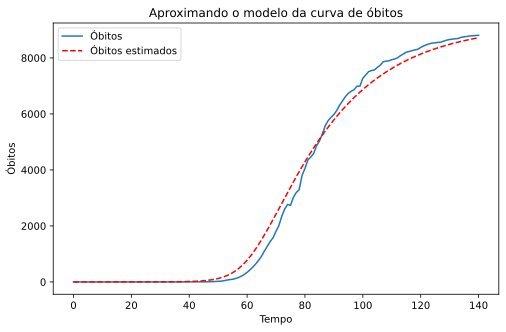

A mediana dos erros é: 0.03116627916534026


In [44]:

d1onda = np.array(dados1onda.total_deaths.fillna(0))
td = np.arange(0, len(d1onda))

plt.figure(figsize= (8,5))
plt.title("Aproximando o modelo da curva de óbitos")
plt.plot(td, d1onda, label = "Óbitos")
plt.plot(td, D_SEIR,  'r--', label = 'Óbitos estimados')
plt.ylabel("Óbitos")
plt.xlabel("Tempo")
plt.legend()
plt.savefig('comp_obitos.svg')

plt.show()

errod = erro(D_SEIR, d1onda)
print(f'A mediana dos erros é: {errod}')


### Plotando a função beta(t) fitada

[0.9549257205484459, 0.08314722769635137, 56.65257075770372, 0.07000000000005846, 0.04800000896369292]


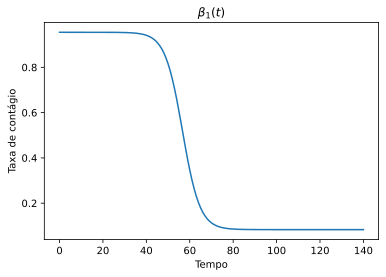

In [45]:
print(param[2:])
k = param[2:5]

plt.figure()

plt.plot(t1onda, betad1(t1onda, *k))
plt.title(r'$\beta_1(t)$')

plt.ylabel('Taxa de contágio')
plt.xlabel('Tempo')

plt.savefig('beta1.svg')
plt.show()

## Calculando o $R_t$ da 1 onda

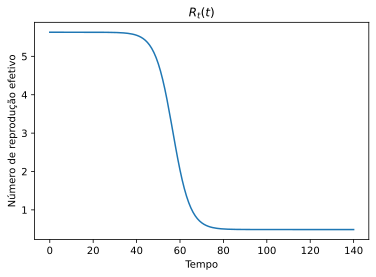

5.628866873506663


In [46]:
def R_0(p, q,b0,b1, x0, gamma_d,delta, gamma):
  return (betad1(t, b0, b1, x0)/(gamma*gamma_d))*(gamma_d*(1-p) + gamma*(1 - delta)*p*q)

def R_t(t, p, q,b0,b1, x0, gamma_d,delta, gamma,S, N):
  return R_0(p, q,b0,b1, x0, gamma_d,delta, gamma)*S/N



R_t = R_t(t1onda, *param, 1/6, S_SEIR, Npop)

plt.figure()

plt.title(r'$R_t(t)$')

plt.plot(t1onda, R_t)

plt.ylabel(r'Número de reprodução efetivo')
plt.xlabel('Tempo')
plt.savefig('Rt.svg')
plt.show()

print(R_t[0])



## Fitando a 2º onda de casos 

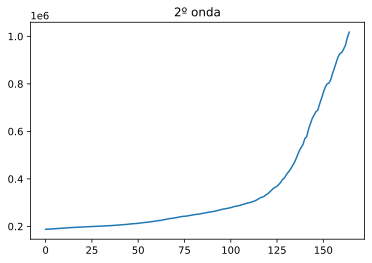

In [47]:
## Fitando a 2º onda de casos 

y2onda = np.array(dados2onda.total_cases)
t2onda = np.arange(0, len(y2onda))

plt.figure()
plt.title("2º onda")
plt.plot(t2onda, y2onda)
plt.show()

Definindo a função $\beta_2(t)$:
$$\beta_2(t) = \cfrac{ \beta_5 - \beta_6}{1 + e^{-k(t - x_0)}} + \beta_1 $$

In [48]:
## Função betad(t):
def betad(t, b5, b6,x0):
        k = 0.25
        return (b5 - b6) /(1 + np.exp(-k * (t - x0))) + b6

Definindo a função $\delta_2(t)$:
$$\delta_2(t) = \cfrac{ \delta_0 - \delta_1}{1 + e^{-\mu(dat - t)}} + \delta_1 $$

In [49]:
def deltadt(t, d_0,d_1, dat):
      mu = 0.25
      return (d_0 - d_1)/(1 + np.exp(-mu*( -t +dat))) + d_1

Definindo a função que ajusta o modelo aos dados

In [50]:
def SolverSEIR2(days, t, yR, Npop):

    def dotSEIR(y,t,Npop,beta,gama, gamad, sigma, p , q, delta):
      S,E,I, Id, R, Rd, D= y 
      dydt = [-beta(t)*S*(I + q*Id)/Npop , 
                beta(t)*S*(I + q*Id)/Npop - sigma*E, 
        (1-p)*sigma*E - gama*I, 
        p*sigma*E -gamad*Id - delta(t)*gamad*Id/(1-delta(t)),
         gama*I,
         gamad*Id,
          delta(t)*gamad*Id/(1-delta(t))]
      return dydt
    
    def betad(t, b5, b6, x0):
        k = 0.25
        return (b5 - b6) /(1 + np.exp(-k * (t - x0))) + b6
    
    def deltadt(t, d_0,d_1,  dat):
      mu = 0.25
      return (d_0 - d_1)/(1 + np.exp(-mu*(t - dat))) + d_1
    
    #### Valores inicias arbitrados dos parâmetros para o processo de otimização dados como tuplas (esperado, mínimo, máximo)
    
    params_init_min_max = { "p": (0.5, 0.01, 0.8),
                           "q": (0.3, 0.01, 0.5),
                           "b5": (0.5, 0.01, 1.0),
                           "b6": (0.5, 0.01, 1.0),
                           "x0": (62, 30, 100),
                           "gamad": (1/14,0.07, 0.143), 
                           "d_0": (0.02, 0.01, 0.048),
                           "d_1": (0.01, 0.009, 0.015),
                           "dat":(20,0, 30)}

   
    
    ### Def. da função solver do sistema de EDOs do modelo SIR que é recursivamente chamada pelo algoritmo de otimização (fitting aos dados)  
    def SolverEDOs(days, Npop, p, q, b5,b6,x0,gamad, d_0,d_1, dat):
        
        # definição da função beta(t) = R_0(t)*gama
        def beta(t):
            return betad(t,b5,b6,x0)

        def delta(t):
          return deltadt(t, d_0,d_1, dat)

        
        # Valores iniciais
        s0 = Npop - e0 - i0 -id0 - r0 - rd0 -d0
        y0 = [s0,e0, i0, id0, r0, rd0, d0]
        
       
        t = np.arange(days)
       
        # Integração do sistema de EDOs -
        ret = odeint(dotSEIR, y0, t, args=(Npop, beta, gama, gamad, sigma, p , q, delta))
        

        # Salvando os resultados nas variáveis do sistema
        S,E,I,Id, R,Rd, D = ret.T

        C = Id + Rd + D

        return t, S, E, I, Id, R, Rd,D, C
    
    ### Definição da função de fitting que chama o solver das EDOs
    def fitter(x,p, q, b5,b6,x0, gamad,  d_0, d_1, dat):
        ret = SolverEDOs(days, Npop, p, q, b5,b6,x0, gamad, d_0,d_1, dat) # <-- chama a função solver das EDOs (que chama odeint para integrar)
        casos_acumulados = ret[8]                               
        return casos_acumulados[x]                              
    
    # Cria o modelo de fitting passando a função fitter como parâmetro para lmfit 
    
    mod = lmfit.Model(fitter)
    #
    # Criação do vetor de parâmetros para o fitting, incluindo 3 estimativas (inicial, min, max) p/cada parâmetro
    for kwarg, (init, mini, maxi) in params_init_min_max.items(): # <-- usa as estimativas fornecidas acima
        mod.set_param_hint(str(kwarg), value=init, min=mini, max=maxi, vary=True)
    #
    # Criação do vetor de parâmetros para o otimizador
    params = mod.make_params()
    
    # E fazemos o fitting dos dados
    result_roll = mod.fit(yR, params, method="least_squares", x=t)
    
    ### Parâmetros otimizados 
    paramsfit = result_roll.best_values
    
    parametros = []
    parametros.append(paramsfit['p'])
    parametros.append(paramsfit['q'])
    parametros.append(paramsfit['b5'])
    parametros.append(paramsfit['b6'])
    parametros.append(paramsfit['x0'])
    parametros.append(paramsfit['gamad'])
    parametros.append(paramsfit['d_0'])
    parametros.append(paramsfit['d_1'])
    parametros.append(paramsfit['dat'])

    ### Chamada do SOLVER com os parâmetros otimizados da curva logística para R_0(t) para obter as var SEIRD

    res_SEIRD_roll = SolverEDOs(days, Npop,*parametros)
    #
    return res_SEIRD_roll, parametros

Definindo o modelo separadamente: 

In [51]:
def SEIR2(t,y,Npop,p,q,b5,b6,x0,  gamad, d_0,d_1,  dat,sigma, gama):
  S,E,I,Id,R,Rd, D = y
  dydt = [-betad(t, b5, b6, x0)*S*(I + q*Id)/Npop,betad(t, b5, b6, x0)*S*(I + q*Id)/Npop - sigma*E, 
        (1-p)*sigma*E - gama*I, p*sigma*E -gamad*Id - deltadt(t, d_0,d_1, dat)*gamad*Id/(1 - deltadt(t, d_0,d_1, dat)) ,
                gama*I,gamad*Id,
          deltadt(t, d_0,d_1,  dat)*gamad*Id/(1 - deltadt(t, d_0,d_1, dat)),]
  return dydt

Ajustando o modelo aos dados:

A mediana dos erros é: 0.02141743251725683
Valores estimados 
 p= 0.37541067692639596
 q= 0.49999902360762094
 b5= 0.3000119872138702
 b6= 0.2388885998672983
 x0= 77.31461344741678
 gamad= 0.14299997885414895
 d_0= 0.0479999999454684
 d_1= 0.009000000032919762
 dat= 21.213799870360134



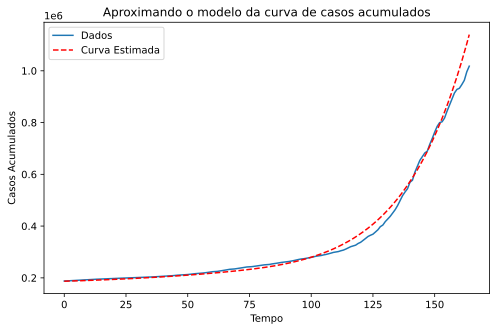

In [52]:
Npop = 83020000
gama = 1/6
e0 = E_SEIR[-1]
i0 = I_SEIR[-1]
id0 = Id_SEIR[-1]
r0 = R_SEIR[-1]
rd0 = Rd_SEIR[-1]
d0 = D_SEIR[-1]
s0 = Npop - e0 - i0 - id0 - r0 - rd0 - d0

sigma = 1/5

X0_SEIR2 = [s0,e0,i0,id0,r0,rd0,d0]

param = SolverSEIR2(len(t2onda), t2onda, y2onda, Npop)[1]



X_SEIR2 = solve_ivp(SEIR2, t_span=[t2onda[0], t2onda[-1]], y0 = X0_SEIR2, t_eval = t2onda, args=(Npop,*param, sigma, gama))

S_SEIR2 = X_SEIR2.y[0]
E_SEIR2 = X_SEIR2.y[1]
I_SEIR2 = X_SEIR2.y[2]
Id_SEIR2 = X_SEIR2.y[3]
R_SEIR2 = X_SEIR2.y[4]
Rd_SEIR2 = X_SEIR2.y[5]
D_SEIR2 = X_SEIR2.y[6]


C2 = Id_SEIR2 +Rd_SEIR2 + D_SEIR2

plt.figure(figsize= (8,5))
plt.title('Aproximando o modelo da curva de casos acumulados')
plt.plot(t2onda, y2onda, label = 'Dados')
plt.plot(t2onda,C2, 'r--', label ='Curva Estimada')
plt.xlabel('Tempo')
plt.ylabel('Casos Acumulados')
plt.legend()
plt.savefig('fitting2onda.svg')

erroc = erro(C2, y2onda)
print(f'A mediana dos erros é: {erroc}')

print(f'Valores estimados \n p= {param[0]}\n q= {param[1]}\n b5= {param[2]}\n b6= {param[3]}\n x0= {param[4]}\n gamad= {param[5]}\n d_0= {param[6]}\n d_1= {param[7]}\n dat= {param[8]}\n')


Plotando as outras curvas:

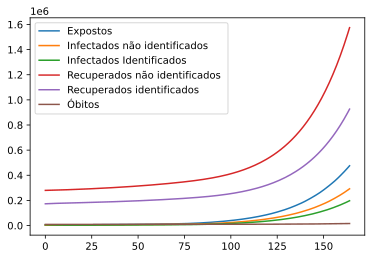

In [53]:
plt.figure()
t = t2onda
#plt.plot(t, S_SEIAR, label = 'Suscetíveis')
plt.plot(t, E_SEIR2, label = 'Expostos')
plt.plot(t, I_SEIR2, label = 'Infectados não identificados')
plt.plot(t, Id_SEIR2, label = 'Infectados Identificados')
plt.plot(t, R_SEIR2, label = 'Recuperados não identificados ')
plt.plot(t, Rd_SEIR2, label = 'Recuperados identificados')
plt.plot(t, D_SEIR2, label = 'Óbitos')

plt.legend()
plt.savefig('fitandoasoutrascurvas.svg')
plt.show()

### Comparando a curva de óbitos

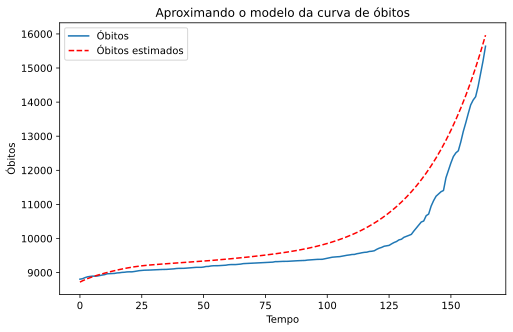

0.026219440096478502


In [54]:
d = np.array(dadosge.total_deaths.fillna(0))[28:]
d2onda = np.array(dados2onda.total_deaths.fillna(0))
td = np.arange(0, len(d2onda))

plt.figure(figsize = (8,5))
plt.title("Aproximando o modelo da curva de óbitos")
plt.plot(td, d2onda, label = "Óbitos")
plt.plot(td, D_SEIR2,  'r--', label = 'Óbitos estimados')
plt.savefig('Comparando_obitos2.svg')
plt.ylabel('Óbitos')
plt.xlabel('Tempo')
plt.legend()
plt.show()

print(erro(D_SEIR2, d2onda))


### Plotando  a função beta(t) fitada 

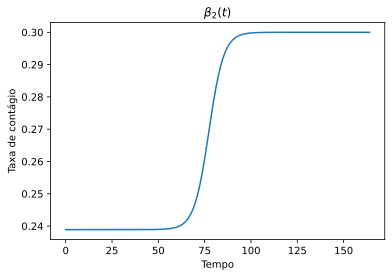

In [55]:
#print(param[2:])
k = param[2:5]


plt.figure()

plt.plot(t2onda, betad(t2onda, *k))
plt.title(r'$\beta_2(t)$')
plt.ylabel('Taxa de contágio')
plt.xlabel('Tempo')
plt.savefig('beta2.svg')
plt.show()

## Plotando a função delta(t)

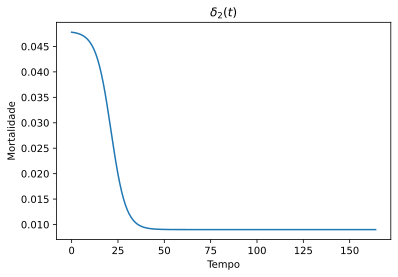

In [56]:
tdi = np.arange(200)

parad = param[-3:]
#print(parad)

plt.plot(t2onda, deltadt(t2onda, *parad))
plt.title(r'$\delta_2(t)$')
plt.ylabel('Mortalidade')
plt.xlabel('Tempo')
plt.savefig('delta2.svg')



## Plotando o $R_t$ para esse modelo

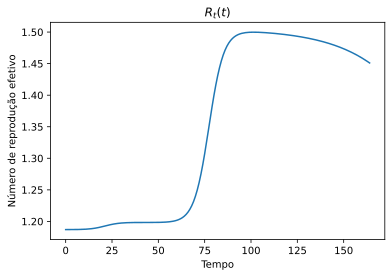

In [60]:
def R_02(t,p,q,b5,b6,x0,  gamma_d, d_0,d_1,  dat, gamma):
  return (betad(t, b5, b6,x0)/(gamma*gamma_d))*(gamma_d*(1-p) + gamma*(1 - deltadt(t, d_0,d_1, dat))*p*q)

def R_t2(t,p,q,b5,b6,x0,  gamma_d, d_0,d_1,  dat, gamma, S, N):
  return R_02(t,p,q,b5,b6,x0,  gamma_d, d_0,d_1,  dat, gamma)*S/N



R_t2 = R_t2(t2onda, *param, 1/6, S_SEIR2, Npop)

plt.figure()

plt.title(r'$R_t(t)$')

plt.plot(t2onda, R_t2)

plt.ylabel(r'Número de reprodução efetivo')
plt.xlabel('Tempo')

plt.savefig('R_t2.svg')
plt.show()

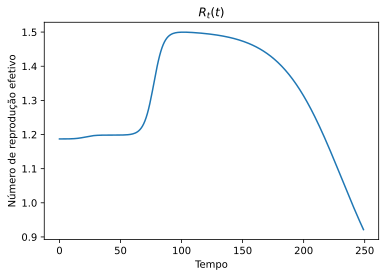

O $R_t(t)$ fica menor que 1 em $t$=240


In [58]:

tr = np.arange(250)


X_SEIRr = solve_ivp(SEIR2, t_span=[tr[0], tr[-1]], y0 = X0_SEIR2, t_eval = tr, args=(Npop,*param, sigma, gama))

S_SEIRr = X_SEIRr.y[0]



def R_02(t,p,q,b5,b6,x0,  gamma_d, d_0,d_1,  dat, gamma):
  return (betad(t, b5, b6,x0)/(gamma*gamma_d))*(gamma_d*(1-p) + gamma*(1 - deltadt(t, d_0,d_1, dat))*p*q)

def R_t2(t,p,q,b5,b6,x0,  gamma_d, d_0,d_1,  dat, gamma, S, N):
  return R_02(t,p,q,b5,b6,x0,  gamma_d, d_0,d_1,  dat, gamma)*S/N



R_t2 = R_t2(tr, *param, 1/6, S_SEIRr, Npop)

plt.figure()

plt.title(r'$R_t(t)$')

plt.plot(tr, R_t2)

plt.ylabel(r'Número de reprodução efetivo')
plt.xlabel('Tempo')
plt.show()

i = 0
while i <= len(R_t2):
  if R_t2[i] < 1:
    print(f'O $R_t(t)$ fica menor que 1 em $t$={i}')
    break
  i = i+1

## Prevendo o número de casos acumulados e óbitos nos próximos 15 dias.

In [ ]:
tprev = np.arange(0, len(t2onda) + 16)

X_SEIRprev = solve_ivp(SEIR2, t_span=[tprev[0], tprev[-1]], y0 = X0_SEIR2, t_eval = tprev, args=(Npop,*param, sigma, gama))


Id_SEIRprev = X_SEIRprev.y[3]

Rd_SEIRprev = X_SEIRprev.y[5]

D_SEIRprev = X_SEIRprev.y[6]


Cprev = Id_SEIRprev +Rd_SEIRprev + D_SEIRprev

print(f"Casos acumulados em 11/12/2020:{Cprev[-1]}")

print(f"Óbitos acumulados em 11/12/2020: {D_SEIRprev[-1]}")

## Agrupando as duas ondas: 

### Casos Acumulados:

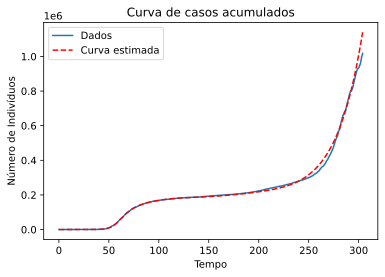

A mediana dos erros é: 0.018435909572132272


In [61]:
Cf = np.concatenate([C, C2[1:]])
t = np.arange(0, len(dados.date))
plt.figure()

plt.title('Curva de casos acumulados')
plt.plot(t, y, label= "Dados")
plt.plot(t, Cf, 'r--', label = "Curva estimada")
plt.ylabel('Número de Indivíduos')
plt.xlabel('Tempo')
plt.legend()
plt.savefig('casos_acumulados.svg')
plt.show()


print(f"A mediana dos erros é: {erro(Cf, y)}")

### Óbitos

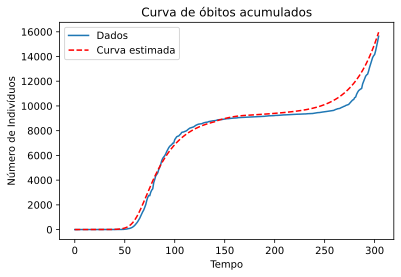

A mediana dos erros é: 0.029579683907254437


In [62]:
Df = np.concatenate([D_SEIR, D_SEIR2[1:]])
d= np.array(dados.total_deaths.fillna(0))
plt.figure()

plt.title('Curva de óbitos acumulados')
plt.plot(t, d, label= "Dados")
plt.plot(t, Df, 'r--', label = "Curva estimada")
plt.ylabel('Número de Indivíduos')
plt.xlabel('Tempo')

plt.legend()
plt.savefig('obitos.svg')
plt.show()
print(f"A mediana dos erros é: {erro(Df, d)}")